In [1]:
# http://ml-ko.kr/homl2/tools_numpy.html
# http://ml-ko.kr/homl2/tools_pandas.html

# 선형 회귀는 특성이 많을수록 성능이 좋아진다.
# 특성을 수작업으로 입력하지 않고 sklearn이 PolynomialFeatures로 쉽게 작성할 수 있다. 
# 두께를 추가하여 데이터 셋을 가져왔다. 
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data') #read_csv는 heading을 불러오지 않는다.
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# 타겟 데이터는 이전과 동일함
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
# 훈련 세트와 테스트 세트를 나눈다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


In [3]:
# PolynomialFeatures 클래스로 
from sklearn.preprocessing import PolynomialFeatures

# fit(), transform()을 사용해 특성을 만들거나 전처리를 할 수 있으며, 이런 클래스를 sklearn에서는 변환기(transformer)라고 한다.
poly = PolynomialFeatures()

# sample 2, 3을 적용하여 테스트해본다.

# 새롭게 만들 특성 조합을 찾는다.
poly.fit([[2,3]])

# 실제로 데이터를 변환한다.
# 결과는 [[1. 2. 3. 4. 6. 9.]]
# 2와 3을 각기 제곱한 4, 9가 추가되었고, 2 * 3으로 6이 생성되었다.
# 1은 무게 = a * 길이 + b*높이 + c * 두께 + d * 1 이기 때문에
# 1은 절편으로 기본으로 추가된다.
print(poly.transform([[2,3]]))



[[1. 2. 3. 4. 6. 9.]]


In [4]:
# 1을 포함하지 않으려면 아래과 같이 bias = False로 설정하면 된다.
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [5]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

# 어떤 식으로 feature를 생성하는지 룰이 나와 있다.
# 예를 들면 x0 ^ 2는 가장 처음 값의 제곱이라는 의미, x0 x2는 x0 곱하기 x2를 의미한다.
print(poly.get_feature_names_out())

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [6]:
test_poly = poly.transform(test_input)

In [7]:
# 결과 0.99로 매우 성과가 높아졌으며, 훈련 세트 점수도 0.97로 더 좋아졌다.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [8]:
# degree는 넣을 수 있는 특성 갯수의 최대치를 지정한다. ( = 고차항의 최대 차수 지정)
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)


(42, 55)


In [9]:
# 적용한 특성을 가지고 훈련을 한다.
# 0.999로 더 높아졌다.
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 하지만 많은 특성이 포함될 수록, 과대 적합으로 인하여 테스트 세트에는 형편없는 점수를 만들 수 있다.
# 실제로 값이 -144로 테스트에서는 형편이 없다.
print(lr.score(test_poly, test_target))

0.9999999999991097
-144.40579242684848


In [10]:
# 규제(regularization)은 과도한 학습을 방지하는 것을 이야기 한다.
# 규제를 적용한 선형 회귀로는 릿지 회귀와 라쏘 회귀가 있다.

poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [13]:
# 릿지(ridge) 회귀 
# 계수를 제곱한 값을 기준으로 규제를 적용
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


In [20]:
# 적당한 alpha 값을 찾는 방법은 R^2값의 그래프를 그려 보는 것
# alpha = 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값
# alpha값과 같이 사람이 정해줘야 하는 값을 하이퍼 파라매터라고 한다.

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # ridbe 모델을 생성
    ridge = Ridge(alpha=alpha)

    # ridge 모델을 훈련
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

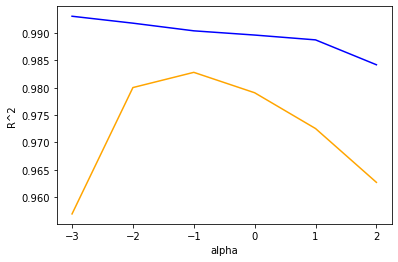

In [22]:
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color = 'orange')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [23]:
# alpha 값이  0.1일 때 가장 높기 때문에 0.1을 적용한다.

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


In [25]:
# 라쏘 회귀 (Lasso)
# 계수의 절대값을 기준으로 규제를 적용
# 라쏘 계수의 크기를 0으로 만들 수 있다.
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [26]:
# 라쏘에서 alpha 값 적용
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # Lasso 모델을 생성
    # max_iter가 적으면 ConvergenceWarning: Objective did not converge.메시지 발생
    lasso = Lasso(alpha=alpha, max_iter=10000)

    # Lasso 모델을 훈련
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


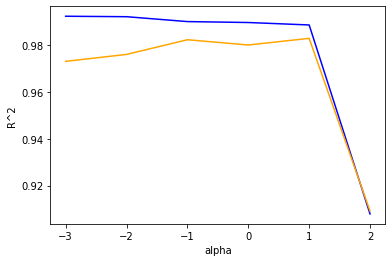

In [28]:
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color = 'orange')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 alpha 값은 10이다.

In [29]:
# 최적의 alpha값을 적용하여 다시 훈련
lasso = Lasso(alpha=10)

lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [30]:
# lasso에서 계수가 0이 될 수 있는 목록
# 결과 : 40, 즉 40건의 coef_ 값이 0이라는 이야기.55건의 특성이 고작 15건 밖에 적용이 안된다는 이야기이다.
print(np.sum(lasso.coef_ == 0))

40


정리 : 하이퍼 파라미터는 머신러닝 알고리즘이 학습하지 않는 파라미터이다. 이런 파라미터는 사람이 사전에 지정해야 한다. 대표적으로 릿지와 라쏘의 규제 강도인 alpha 값이다.
